# Desafio 6

Neste desafio, vamos praticar _feature engineering_, um dos processos mais importantes e trabalhosos de ML. Utilizaremos o _data set_ [Countries of the world](https://www.kaggle.com/fernandol/countries-of-the-world), que contém dados sobre os 227 países do mundo com informações sobre tamanho da população, área, imigração e setores de produção.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
#import sklearn as sk

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


In [2]:
# Algumas configurações para o matplotlib.
#%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

In [3]:
countries = pd.read_csv("countries.csv")

In [4]:
new_column_names = [
    "Country", "Region", "Population", "Area", "Pop_density", "Coastline_ratio",
    "Net_migration", "Infant_mortality", "GDP", "Literacy", "Phones_per_1000",
    "Arable", "Crops", "Other", "Climate", "Birthrate", "Deathrate", "Agriculture",
    "Industry", "Service"
]

countries.columns = new_column_names

countries.head(5)

,Country,Region,Population,Area,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


## Observações

Esse _data set_ ainda precisa de alguns ajustes iniciais. Primeiro, note que as variáveis numéricas estão usando vírgula como separador decimal e estão codificadas como strings. Corrija isso antes de continuar: transforme essas variáveis em numéricas adequadamente.

Além disso, as variáveis `Country` e `Region` possuem espaços a mais no começo e no final da string. Você pode utilizar o método `str.strip()` para remover esses espaços.

## Inicia sua análise a partir daqui

In [5]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           227 non-null    object 
 1   Region            227 non-null    object 
 2   Population        227 non-null    int64  
 3   Area              227 non-null    int64  
 4   Pop_density       227 non-null    object 
 5   Coastline_ratio   227 non-null    object 
 6   Net_migration     224 non-null    object 
 7   Infant_mortality  224 non-null    object 
 8   GDP               226 non-null    float64
 9   Literacy          209 non-null    object 
 10  Phones_per_1000   223 non-null    object 
 11  Arable            225 non-null    object 
 12  Crops             225 non-null    object 
 13  Other             225 non-null    object 
 14  Climate           205 non-null    object 
 15  Birthrate         224 non-null    object 
 16  Deathrate         223 non-null    object 
 1

In [6]:
# Treatment of variables that are float with commas
numerical_columns = ['Pop_density', 'Coastline_ratio', 'Net_migration', 'Infant_mortality', 
                              'Literacy', 'Phones_per_1000', 'Arable', 'Crops', 'Other', 'Climate', 
                              'Birthrate', 'Deathrate', 'Agriculture', 'Industry', 'Service']

# Removing spaces before and after the string
categorical_columns = ['Region', 'Country']

for col in numerical_columns:
    countries[col] = countries[col].str.replace(',', '.')
    countries[col] = pd.to_numeric(countries[col])
    
for col in categorical_columns:
    countries[col] = countries[col].str.strip().values

In [7]:
# obtaining information from the null variables
countries_info = pd.DataFrame({
    'column': countries.columns,
    'column_index': np.arange(0, len(countries.columns)), 
    'column_type': countries.dtypes,
    'quantity_null': countries.isnull().sum()    
})

countries_info['percent_null'] = countries_info['quantity_null']/countries.shape[0]
countries_info

,column,column_index,column_type,quantity_null,percent_null
Country,Country,0,object,0,0.000000
Region,Region,1,object,0,0.000000
Population,Population,2,int64,0,0.000000
Area,Area,3,int64,0,0.000000
Pop_density,Pop_density,4,float64,0,0.000000
Coastline_ratio,Coastline_ratio,5,float64,0,0.000000
Net_migration,Net_migration,6,float64,3,0.013216
Infant_mortality,Infant_mortality,7,float64,3,0.013216
GDP,GDP,8,float64,1,0.004405
Literacy,Literacy,9,float64,18,0.079295


In [8]:
# Describing the number of types in dataset
countries_info['column_type'].value_counts()

float64    16
int64       2
object      2
Name: column_type, dtype: int64

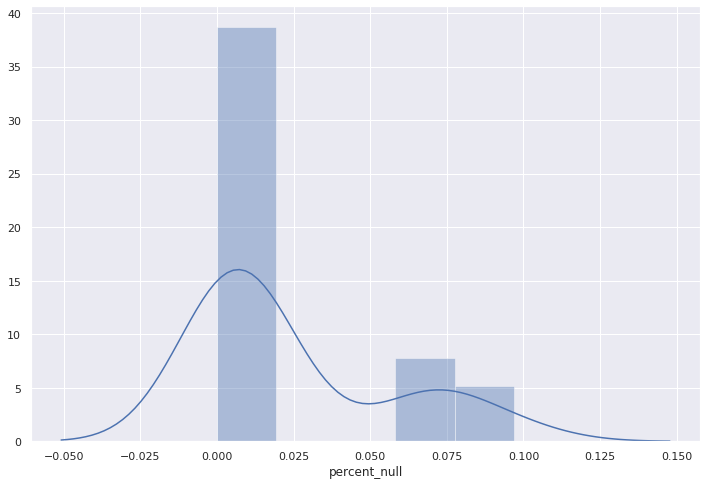

In [9]:
ax = sns.distplot(countries_info['percent_null'])

## Questão 1

Quais são as regiões (variável `Region`) presentes no _data set_? Retorne uma lista com as regiões únicas do _data set_ com os espaços à frente e atrás da string removidos (mas mantenha pontuação: ponto, hífen etc) e ordenadas em ordem alfabética.

In [10]:
def q1():
    """
    List of uniques regions in dataset `countries`
    
    Returns:
    -------
        x: list
            List of unique `Region` in an orderly manner
    """
    return list(np.sort(countries['Region'].unique()))
    
q1()

['ASIA (EX. NEAR EAST)',
 'BALTICS',
 'C.W. OF IND. STATES',
 'EASTERN EUROPE',
 'LATIN AMER. & CARIB',
 'NEAR EAST',
 'NORTHERN AFRICA',
 'NORTHERN AMERICA',
 'OCEANIA',
 'SUB-SAHARAN AFRICA',
 'WESTERN EUROPE']

## Questão 2

Discretizando a variável `Pop_density` em 10 intervalos com `KBinsDiscretizer`, seguindo o encode `ordinal` e estratégia `quantile`, quantos países se encontram acima do 90º percentil? Responda como um único escalar inteiro.

In [11]:
def q2():
    """
    Counter of countries after discretization they are with >= 90 percentile
    
    Returns:
    -------
        x:  int
        Number of countries with `pop_density` >= 90 percentile
    """
    kb_discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
    return np.count_nonzero(kb_discretizer.fit_transform(countries[['Pop_density']]) >=9)
q2()

23

# Questão 3

Se codificarmos as variáveis `Region` e `Climate` usando _one-hot encoding_, quantos novos atributos seriam criados? Responda como um único escalar.

In [12]:
def q3():
    """
    Number of variables counter after encoding `Region` and `Climate`
    
    Returns:
    -------
        x: int
            Number of attributes encoded (one-hot encoding) without removing NaNs
    """
    return countries['Region'].nunique(dropna=False) + countries['Climate'].nunique(dropna=False)

q3()

18

## Questão 4

Aplique o seguinte _pipeline_:

1. Preencha as variáveis do tipo `int64` e `float64` com suas respectivas medianas.
2. Padronize essas variáveis.

Após aplicado o _pipeline_ descrito acima aos dados (somente nas variáveis dos tipos especificados), aplique o mesmo _pipeline_ (ou `ColumnTransformer`) ao dado abaixo. Qual o valor da variável `Arable` após o _pipeline_? Responda como um único float arredondado para três casas decimais.

In [13]:
test_country = [
    'Test Country', 'NEAR EAST', -0.19032480757326514,
    -0.3232636124824411, -0.04421734470810142, -0.27528113360605316,
    0.13255850810281325, -0.8054845935643491, 1.0119784924248225,
    0.6189182532646624, 1.0074863283776458, 0.20239896852403538,
    -0.043678728558593366, -0.13929748680369286, 1.3163604645710438,
    -0.3699637766938669, -0.6149300604558857, -0.854369594993175,
    0.263445277972641, 0.5712416961268142
]

In [14]:
# Mechanism for selecting variables of a given type before the pipeline
# however it can be easily replaced by `make_column_selector (dtype_exclude = 'object')`
numerical_features = countries_info[countries_info.column_type != 'object'].column.values

pipeline_numerical = ColumnTransformer(transformers=[('selector', 'passthrough', numerical_features)])

pipeline = Pipeline(steps = [('pipeline_numerical', pipeline_numerical),
                             ('imputer', SimpleImputer(strategy='median')), 
                             ('scaler',  StandardScaler())])

pipeline.fit(countries)

test_country_transformed = pipeline.transform(pd.DataFrame([test_country], columns=countries.columns))
test_country_transformed = pd.DataFrame(test_country_transformed, columns=numerical_features)
test_country_transformed

,Population,Area,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,-0.244325,-0.334891,-0.228847,-0.29726,0.019591,-1.028617,-0.966233,-4.354272,-1.03721,-1.046857,-0.550581,-5.101122,-1.218122,-2.024552,-1.990921,-7.04915,-0.139155,0.034903


In [15]:
def q4():
    return float(round(test_country_transformed.Arable[0], 3))

q4()

-1.047

## Questão 5

Descubra o número de _outliers_ da variável `Net_migration` segundo o método do _boxplot_, ou seja, usando a lógica:

$$x \notin [Q1 - 1.5 \times \text{IQR}, Q3 + 1.5 \times \text{IQR}] \Rightarrow x \text{ é outlier}$$

que se encontram no grupo inferior e no grupo superior.

Você deveria remover da análise as observações consideradas _outliers_ segundo esse método? Responda como uma tupla de três elementos `(outliers_abaixo, outliers_acima, removeria?)` ((int, int, bool)).

In [16]:
def q5():
    """
    Tuple of values that using bloxplot could be considered anomalies
    Returns:
    -------
        x: tuple (outliers_below, outliers_above, drop?)
    """
    quartiles = countries['Net_migration'].quantile([0.25, 0.75]).values
    iqr = quartiles[1]-quartiles[0]
    
    outliers_below = countries.Net_migration[countries.Net_migration < (quartiles[0]-1.5*iqr)].values
    outliers_above = countries.Net_migration[countries.Net_migration > (quartiles[1]+1.5*iqr)].values
    return (outliers_below.shape[0], outliers_above.shape[0], False)
q5()

(24, 26, False)

Eu não removeria essas linhas por que elas são boa parte dos dados 22% aproximadamente, seria mais interessante colocar como valor NaN e aplicar algum preenchimento.

## Questão 6
Para as questões 6 e 7 utilize a biblioteca `fetch_20newsgroups` de datasets de test do `sklearn`

Considere carregar as seguintes categorias e o dataset `newsgroups`:

```
categories = ['sci.electronics', 'comp.graphics', 'rec.motorcycles']
newsgroup = fetch_20newsgroups(subset="train", categories=categories, shuffle=True, random_state=42)
```


Aplique `CountVectorizer` ao _data set_ `newsgroups` e descubra o número de vezes que a palavra _phone_ aparece no corpus. Responda como um único escalar.

In [17]:
from sklearn.datasets import fetch_20newsgroups
categories = ['sci.electronics', 'comp.graphics', 'rec.motorcycles']
newsgroup = fetch_20newsgroups(subset="train", categories=categories, shuffle=True, random_state=42)

In [18]:
newsgroup.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [19]:
count_vectorizer = CountVectorizer()

newsgroup_vetorized = count_vectorizer.fit_transform(newsgroup.get('data'))
newsgroup_vetorized = pd.DataFrame(newsgroup_vetorized.toarray(), columns=count_vectorizer.get_feature_names())
newsgroup_vetorized.head()

,00,000,0000,0000000004,0000000005,0000000667,0000001200,000005102000,0001,000100255pixel,...,zyeh,zygot,zyxel,zz,zzr11,zzr1100,zzzzzz,ªl,³ation,ýé
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
def q6():
    """
    Number that a words `phone` occurs in corpus
    Returns:
    -------
        x: int
    """
    return int(newsgroup_vetorized['phone'].sum())

q6()

213

## Questão 7

Aplique `TfidfVectorizer` ao _data set_ `newsgroups` e descubra o TF-IDF da palavra _phone_. Responda como um único escalar arredondado para três casas decimais.

In [21]:
tfidf_vectorizer = TfidfVectorizer()

newsgroup_tfidf_vet = tfidf_vectorizer.fit_transform(newsgroup.get('data'))
newsgroup_tfidf_vet = pd.DataFrame(newsgroup_tfidf_vet.toarray(), columns=tfidf_vectorizer.get_feature_names())
newsgroup_tfidf_vet.head()

,00,000,0000,0000000004,0000000005,0000000667,0000001200,000005102000,0001,000100255pixel,...,zyeh,zygot,zyxel,zz,zzr11,zzr1100,zzzzzz,ªl,³ation,ýé
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.038791,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
def q7():
    """
    The importance of a `phone` term using tf-idf
    Returns:
        x: int
    """
    return float(round(newsgroup_tfidf_vet['phone'].sum(), 3))

q7()

8.888